## STROOP PHENOMENON

 In this notebook, we are going to analyse the response times of different people in the experiment. The experiment records the time required by the person to read a set of congruent and incongruent words. We will perform some statistical tests on the dataset and see if any conclusion can be derived from it.



In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")
% matplotlib inline


In [2]:
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [9]:
diffs = df['Incongruent'] - df['Congruent']
diffs.mean()  ####mean difference

7.964791666666667

In [10]:
diffs.std()        ###standard deviation of diffs

4.864826910359056

In this dataset, the independent variable is the set of words which are being displayed, they might be congruent on incongruent. That is the only activity which is being controlled by us, and the response times are the dependent variables. Different set of congruent/incongruent variables lead to different response times . Hence, the dependent variables are the Congruent and Incongruent times.

In [3]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [4]:
df.std()

Congruent      3.559358
Incongruent    4.797057
dtype: float64

>From here, we can see that the mean completion time for the congruent set of words is ~14 seconds , while mean time for the incongruent set is ~22 sec.
>
>The median time of completion in congruent set is ~14 sec, while for incongruent set it is ~21 sec.
>
>The standard deviation of congruent times is 3.55, while of incongruent times is 4.79 . 
>
>Let us now plot the response times of each participant.

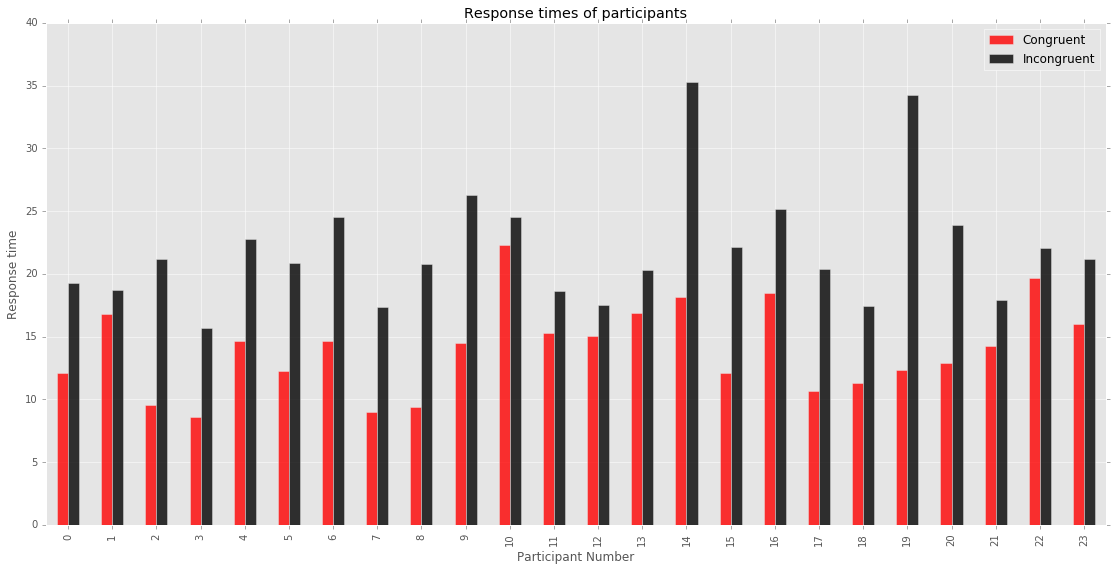

In [5]:
df.plot(kind='bar', color=['red', 'black'], figsize=(19,9), alpha=0.8);
plt.title('Response times of participants');
plt.xlabel('Participant Number');
plt.ylabel('Response time');

We notice that in most cases, there is a big difference in the times of the congruent and inconguent sets. Let's plot a bar chart of only the differences to highlight it more clearly.

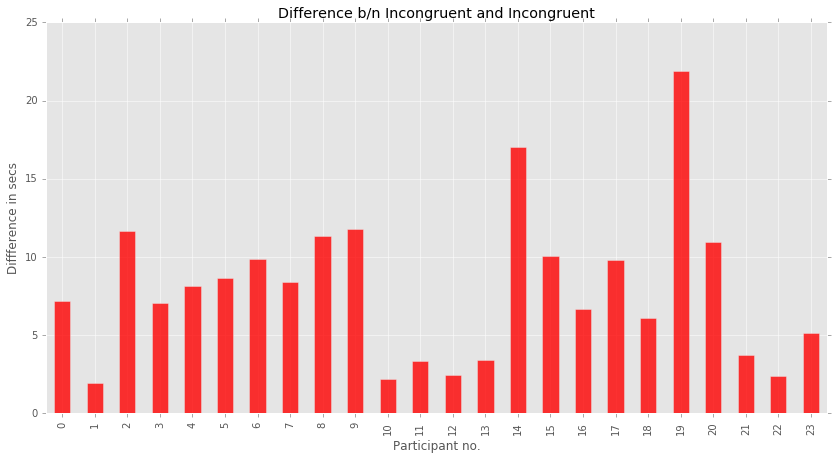

In [13]:
(df['Incongruent'] - df['Congruent']).plot(kind='bar', color='red', figsize=(14,7), alpha=0.8);
plt.title('Difference b/n Incongruent and Incongruent');
plt.xlabel('Participant no.');
plt.ylabel('Diffference in secs');

We can see that most participants have a difference close to 8 seconds, and a few also have a difference of 8+ seconds.

#### STATISTICAL TEST

What we would like to know if there is an actual significant difference in the congruence and incongruence times.
Let us set a hypothesis testing the difference in average response times to the different sets. The statistic being tested is the difference in population mean of response times, with a tolerance of 5% Type I error. The hypothesis's are :
    
   >Null hypothesis will be : **$u_{incongruent}$** - **$u_{congruent}$** <= 0
   >
   >Alternate hypothesis will be : **$u_{incongruent}$** -**$u_{congruent}$** > 0
   >
   >here u is the population mean response time
   >
   >The test will be a Paired one-tail T-test( dependent test) with 2 tests per participant. We will proceed with a t-test, rather than a z-test because not only do we not have the population standard deviation, our sample size is also below 30. A t-test is appropriate here because we are trying to find a significant difference in between the mean response times. 
   >
   ><b>Assumptions involved</b>:
   > The dependent variable is continuous, the observations are independent of one another, the dependent variable is approximately normally distributed and that the dependent variable doesn't contain any outliers. 

#### STATISTIC TESTS
><b>sample size (n) </b> : 24                
>
><b>mean difference(d) (calculated above)</b> = (df['Incongruent'] - df['Congruent'])/n = 7.964
>
><b>standard deviation(calculated above)</b> = 4.86
>
><b>Standard error of difference  SE(d) </b> = sd/sqrt(n) = 4.86/sqrt(24) = 0.99
>
><b>t-Statistic</b> T = d/SE(d) = 7.964/0.99 = 8.04
>
><b>Calculating p-value by looking up the t-distribution with df=23(n-1) : </b> Looking up the table, we see that our p-value is much less than 0.0005, for the given T-stat. 


#### CONCLUSION
> The p-value is much less than the critical p-value(0.05). Hence we can safely conclude that there is a significant difference in the response times of participants in congruent and incongruent set of words. The null hypothesis is hence rejected. 

This result matches with what I expected. 